<a href="https://colab.research.google.com/github/yucellgereklioglu/coin-hisse-tahmini/blob/main/samsung_stocks_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import sklearn.linear_model as lm
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import prophet as pr
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [15]:
df=pd.read_csv('/content/archive (5) (1).zip')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.709961,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.859863,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.098145,46880000


In [16]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6122,2024-06-07,78400.0,78600.0,77100.0,77300.0,77300.0,21189349
6123,2024-06-10,76100.0,76600.0,75600.0,75700.0,75700.0,14598755
6124,2024-06-11,75900.0,76000.0,75100.0,75200.0,75200.0,16971175
6125,2024-06-12,75300.0,77100.0,75200.0,76500.0,76500.0,19246725
6126,2024-06-13,78400.0,79000.0,77800.0,78600.0,78600.0,33763804


In [17]:
x=df.drop(["Close"],axis=1)
y=df["Close"]

In [18]:
pd.isnull(df).sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [19]:
df['Date']=pd.to_datetime(df['Date'])

In [20]:
df[ 'Date'] =  df['Date'].apply(lambda x: x.timestamp())

In [21]:
df["Date"]=df["Date"].astype(int)

In [22]:
df['Date']=pd.to_numeric(df['Date'])

In [38]:
df=pd.read_csv('/content/archive (5) (1).zip',low_memory=False,parse_dates=['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.709961,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.859863,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.098145,46880000
...,...,...,...,...,...,...,...
6122,2024-06-07,78400.0,78600.0,77100.0,77300.0,77300.000000,21189349
6123,2024-06-10,76100.0,76600.0,75600.0,75700.0,75700.000000,14598755
6124,2024-06-11,75900.0,76000.0,75100.0,75200.0,75200.000000,16971175
6125,2024-06-12,75300.0,77100.0,75200.0,76500.0,76500.000000,19246725


<Axes: xlabel='Date', ylabel='Close'>

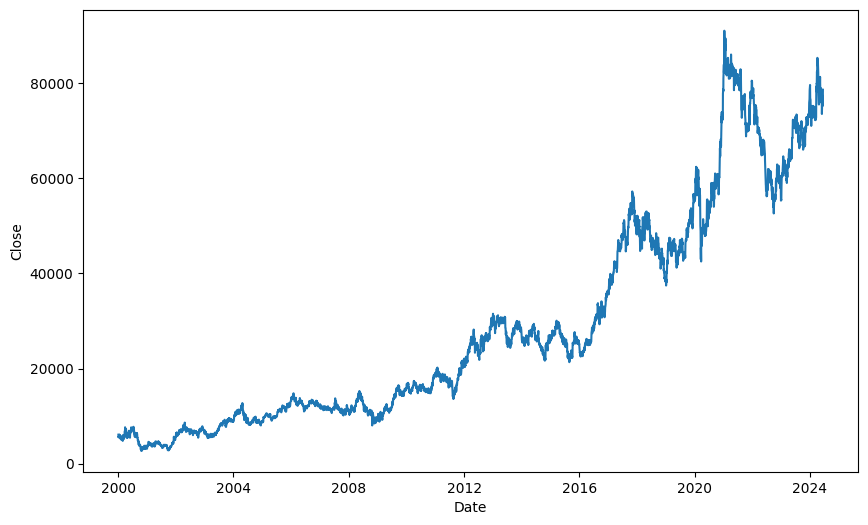

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=df, ax=ax)

In [40]:
df.head().T

,0,1,2,3,4
Date,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-10 00:00:00
Open,6000.0,5800.0,5750.0,5560.0,5600.0
High,6110.0,6060.0,5780.0,5670.0,5770.0
Low,5660.0,5520.0,5580.0,5360.0,5580.0
Close,6110.0,5580.0,5620.0,5540.0,5770.0
Adj Close,4449.709961,4063.72876,4092.859863,4034.598877,4202.098145
Volume,74195000,74680000,54390000,40305000,46880000


In [23]:
df.dtypes

Date           int64
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [48]:
import pandas as pd


if 'Date' in x_train.columns:
    x_train['Date'] = pd.to_datetime(x_train['Date'])
    x_train['Date'] = x_train['Date'].apply(lambda x: x.timestamp())
    x_train["Date"] = x_train["Date"].astype(int)
else:
    print("Error: 'Date' column not found in x_train DataFrame.")


Error: 'Date' column not found in x_train DataFrame.


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
model=LinearRegression()

In [27]:
x_train.drop("Date",axis=1,inplace=True)

In [28]:
x_test.drop("Date",axis=1,inplace=True)

In [29]:
model.fit(x_train,y_train)

LinearRegression()

In [30]:
y_predict=model.predict(x_test)

In [31]:
model.score(x_test,y_test)

0.9999154212859551

In [52]:
y_predict , y_test.values

(array([56315.32072373, 18583.73854332,  9554.52587661, ...,
        16120.30679157, 19439.93493602, 28623.61272761]),
 array([56500., 18600.,  9560., ..., 15960., 19400., 28400.]))

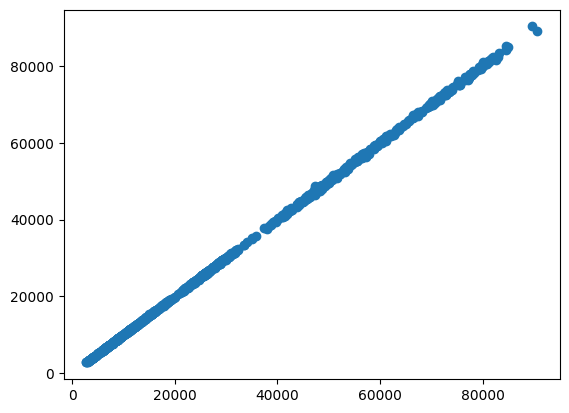

In [53]:
plt.scatter(y_test,y_predict)

In [58]:
df["Date"]=pd.to_datetime(df["Date"])

In [59]:
df=df.rename(columns={"Date":"ds","Close":"y"})

In [75]:
!pip install prophet
from prophet import Prophet
model=Prophet()


In [79]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7fie931/749ykmhp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf7fie931/z4qsr6rm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32367', 'data', 'file=/tmp/tmpf7fie931/749ykmhp.json', 'init=/tmp/tmpf7fie931/z4qsr6rm.json', 'output', 'file=/tmp/tmpf7fie931/prophet_model422olxlt/prophet_model-20240624105311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:53:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:53:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [94]:
future_model=model.make_future_dataframe(periods=730,freq="D")
forecast = model.predict(future_model)
stocks_pred = forecast[['ds', 'yhat']].tail(500)

In [95]:
stocks_pred.tail(500)

,ds,yhat
6357,2025-01-30,81181.113443
6358,2025-01-31,81121.191504
6359,2025-02-01,81864.748806
6360,2025-02-02,81849.642923
6361,2025-02-03,81098.696082
...,...,...
6852,2026-06-09,87163.705148
6853,2026-06-10,87096.879966
6854,2026-06-11,87121.368370
6855,2026-06-12,87066.207426


<Axes: xlabel='ds'>

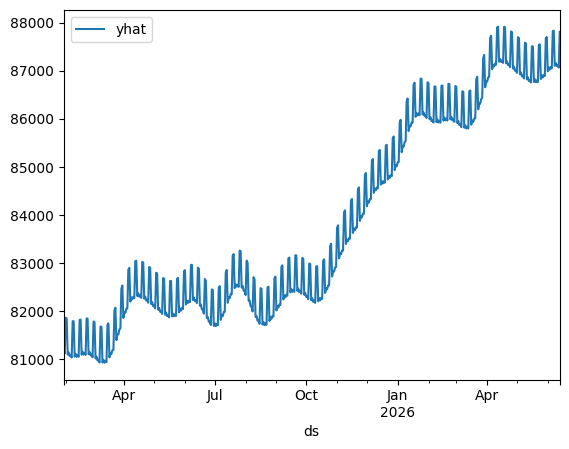

In [96]:
stocks_pred.plot(x='ds',y='yhat')